In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import metrics
from sklearn.metrics import accuracy_score,f1_score,recall_score,precision_score, confusion_matrix
%matplotlib inline

from sklearn.feature_extraction.text import CountVectorizer  #DT does not take strings as input for the model fit step....

In [2]:
df = pd.read_csv(r'E:\Code_Vauld\IOT_GEN_PLOT2\1m8c8s8L_AutoMan_Anomaly\sensor_IOT_1232022.csv')
df.tail(5)

TS        xs1        xs2         xs3        xs4  \
57662  03/12/2022 09:42:18 AM  20.794098  62.162170  600.664172  92.481473   
57663  03/12/2022 09:42:19 AM  20.562695  60.735647  618.797309  90.991660   
57664  03/12/2022 09:42:20 AM  22.255977  61.704526  617.298675  91.432099   
57665  03/12/2022 09:42:21 AM  21.456976  61.558398  636.979299  92.604146   
57666  03/12/2022 09:42:22 AM  21.512819  61.550891  607.331882  90.698066   

              xs5         xs6         xs7        xs8  label  
57662  110.814790  339.936791  616.395365  91.230921      0  
57663  111.459580  333.991896  619.374884  98.286499      8  
57664  110.698177  331.745613  618.710459  93.146930      0  
57665  111.402051  349.385917  618.609751  93.103022      3  
57666  111.439116  344.810803  615.197937  90.794741      0

In [3]:
df  = df.drop(['TS'], axis=1)

In [4]:
df.dtypes

xs1      float64
xs2      float64
xs3      float64
xs4      float64
xs5      float64
xs6      float64
xs7      float64
xs8      float64
label      int64
dtype: object

In [5]:
df.shape

(57667, 9)

In [6]:
df.describe().transpose()

count        mean        std         min         25%         50%  \
xs1    57667.0   21.920052   1.422644   20.550035   21.096691   21.637035   
xs2    57667.0   61.889995   1.369831   60.550019   61.086030   61.629906   
xs3    57667.0  613.294948  12.051468  600.550003  605.933575  611.320921   
xs4    57667.0   92.369235   1.533472   90.550004   91.343536   92.150683   
xs5    57667.0  111.320289   1.156475  110.550003  110.817301  111.083966   
xs6    57667.0  341.876415   8.050474  330.550450  335.809497  341.116596   
xs7    57667.0  612.582736  10.957861  600.550035  605.821858  611.033341   
xs8    57667.0   92.375398   1.721489   90.550069   91.342527   92.123977   
label  57667.0    1.972792   2.574261    0.000000    0.000000    0.000000   

              75%         max  
xs1     22.176882   29.044635  
xs2     62.170686   69.070518  
xs3    616.654562  680.671330  
xs4     92.949227  100.068602  
xs5    111.346587  118.056088  
xs6    346.426997  379.001355  
xs7    616.341766  680.058646  
xs8     92.909356  102.060556  
label    4.000000    8.000000

In [7]:
df.skew().sort_values(ascending=False)

xs5      3.761247
xs8      2.903244
xs7      2.840733
xs2      2.666547
xs3      2.652213
xs1      2.611517
xs4      2.116089
xs6      1.367215
label    1.026498
dtype: float64

In [8]:
df.kurt().sort_values(ascending=False)

xs5      14.061795
xs7      10.628647
xs8      10.264171
xs3       8.473748
xs2       7.747143
xs1       7.176871
xs4       5.713299
xs6       3.114730
label    -0.324193
dtype: float64

In [9]:
df.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8', 'label'], dtype='object')

<AxesSubplot:xlabel='label', ylabel='count'>

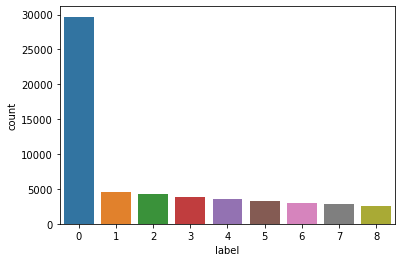

In [10]:
sns.countplot(x="label", data=df)

In [11]:
df.label.value_counts()

0    29697
1     4596
2     4250
3     3856
4     3574
5     3310
6     3011
7     2795
8     2578
Name: label, dtype: int64

In [12]:
X = df.drop('label',axis = 1)
Y = df['label']

In [13]:
print(X.shape,Y.shape)

(57667, 8) (57667,)


## Proceeding the model with Imbalance data to see its accuracy

In [14]:
X_res,y_res=X,Y

In [15]:
X_res.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
57662  20.794098  62.162170  600.664172  92.481473  110.814790  339.936791   
57663  20.562695  60.735647  618.797309  90.991660  111.459580  333.991896   
57664  22.255977  61.704526  617.298675  91.432099  110.698177  331.745613   
57665  21.456976  61.558398  636.979299  92.604146  111.402051  349.385917   
57666  21.512819  61.550891  607.331882  90.698066  111.439116  344.810803   

              xs7        xs8  
57662  616.395365  91.230921  
57663  619.374884  98.286499  
57664  618.710459  93.146930  
57665  618.609751  93.103022  
57666  615.197937  90.794741

In [16]:
y_res.tail()

57662    0
57663    8
57664    0
57665    3
57666    0
Name: label, dtype: int64

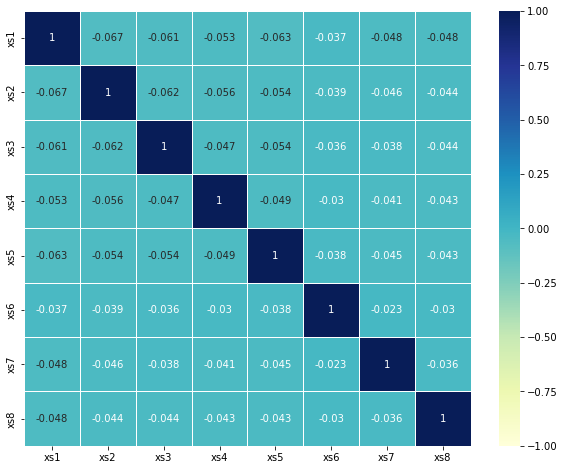

In [17]:
plt.figure(figsize=(10,8))
sns.heatmap(X_res.corr(),
            annot=True,
            linewidths=.5,
            center=0,
            cbar=True,
            cmap="YlGnBu",
            vmin=-1,
            vmax=+1)
plt.show()

In [18]:
X_res.columns

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

In [19]:
df3 = X_res.join(y_res)

In [20]:
df3 = df3.sample(frac = 1).reset_index(drop=True)

In [21]:
df3.tail()

xs1        xs2         xs3        xs4         xs5         xs6  \
57662  25.987238  62.376882  601.109281  90.734546  111.361001  340.650795   
57663  20.592127  62.170483  620.194581  92.943798  110.623965  331.324374   
57664  21.056660  64.589749  603.295535  91.914109  111.080930  346.975798   
57665  20.766261  61.006837  602.984621  91.620229  111.445863  339.818022   
57666  22.025162  60.725903  618.976766  91.047929  111.328621  349.129181   

              xs7        xs8  label  
57662  610.880240  90.811276      1  
57663  620.430324  92.127574      0  
57664  604.543262  91.681018      2  
57665  606.283202  92.399757      0  
57666  601.523643  91.171500      0

In [22]:
df3.to_csv(r'C:\Users\Ganga Babu.M\Anomaly_Classifier_Model\shuffled_12032022.csv')

## Model Building

In [23]:
# splitting data into training and test set for independent attributes
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test =train_test_split(df3.drop(['label'],axis=1), df3['label'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((40366, 8), (17301, 8))

## Decision Tree classifier

In [24]:
model_entropy=DecisionTreeClassifier(criterion='entropy')

In [25]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [26]:
model_entropy.score(X_train, y_train)

1.0

In [27]:
acc = model_entropy.score(X_test, y_test) 
# performance on test data
acc

1.0

### seems Model has been overfitted and perfomring well on test data as well. 
### To get a generalized model can take measure like pre or post prunnig. 
### if model perfoms poor on test we should reduce features or Feature Scaling & Standard Scalar preprocessing.
### In our case we cannot drop any features since it holds vital information of sensor data we cannot drop anything.

In [28]:
# Feature Scaling
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [29]:
model_entropy.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [30]:
model_entropy.score(X_train, y_train)

1.0

In [31]:
acc = model_entropy.score(X_test, y_test) 
# performance on test data
acc

1.0

In [32]:
X_train[0]

array([-0.88082802,  0.19841686,  3.88594161,  0.56219704, -0.36143805,
       -1.03986929,  0.44087214, -0.18194721])

In [33]:
preds_pruned = model_entropy.predict(X_test)

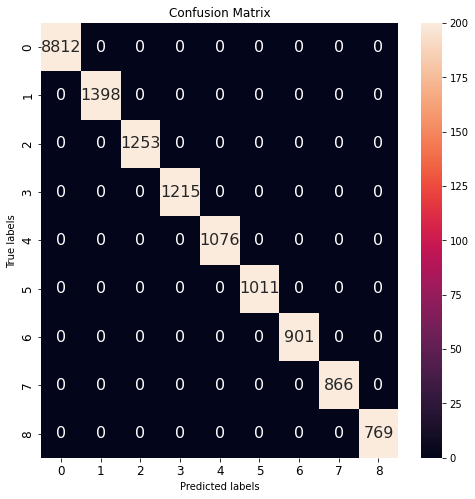

In [34]:
#Decision Tree (Grid Search) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (8,8))
sns.heatmap(confusion_matrix(y_test,preds_pruned),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [35]:
# There is no vast difference interms of accuracy after Feature scaling so we decided to go back with original scaling.

In [36]:
X_train, X_test, y_train, y_test =train_test_split(df3.drop(['label'],axis=1), df3['label'], test_size=.3,
                                                   random_state=22)
X_train.shape,X_test.shape

((40366, 8), (17301, 8))

## Pruning process Model

In [37]:
clf_pruned = DecisionTreeClassifier(criterion = "gini", random_state = 100,
                               max_depth=8, min_samples_leaf=6)
clf_pruned.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=8, min_samples_leaf=6, random_state=100)

In [38]:
clf_pruned.score(X_train, y_train)

0.999801813407323

In [39]:
clf_pruned.score(X_test, y_test)

0.9999421998728397

In [40]:
# Have to mentioned this during fit model didn't struggle at all. 

### Visualizing the tree

In [41]:
#You might need to install pydotplus and graphviz packages for visualising the tree and following lib's

In [42]:
from sklearn.tree import export_graphviz
from six import StringIO  
from IPython.display import Image  
import pydotplus
import graphviz

In [43]:
xvar = df3.drop(['label'], axis=1)
feature_cols = xvar.columns
feature_cols

Index(['xs1', 'xs2', 'xs3', 'xs4', 'xs5', 'xs6', 'xs7', 'xs8'], dtype='object')

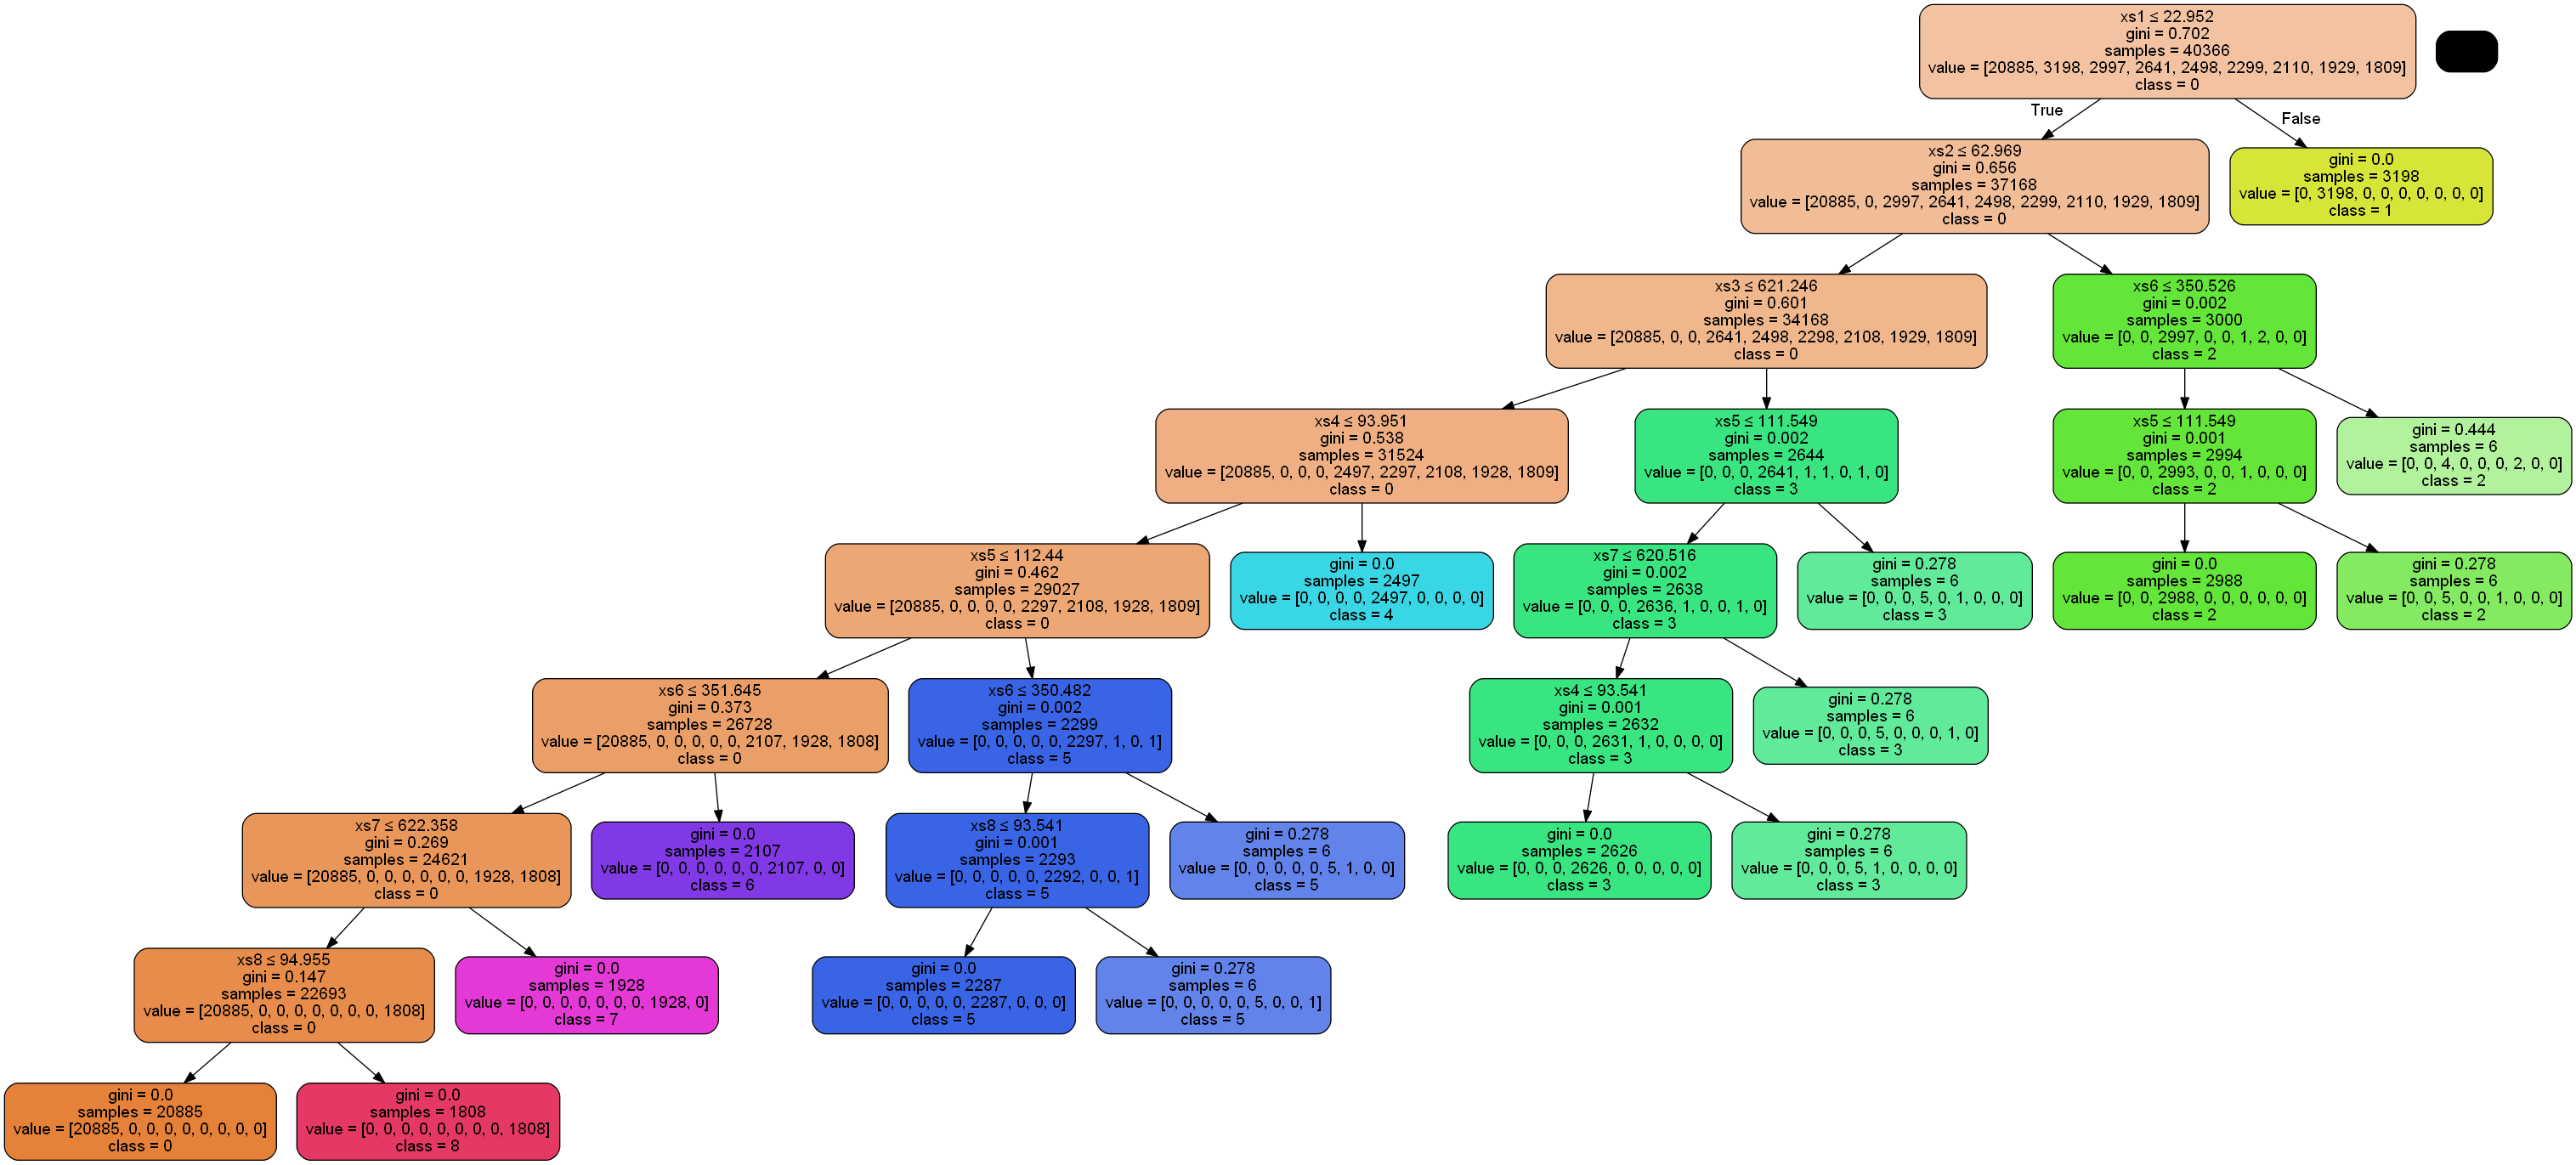

In [44]:
#Print the pruned tree
dot_data = StringIO()
export_graphviz(clf_pruned, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

In [45]:
preds_pruned_train = clf_pruned.predict(X_train)
preds_pruned = clf_pruned.predict(X_test)

In [46]:
print(accuracy_score(y_train,preds_pruned_train))
print(accuracy_score(y_test,preds_pruned))

0.999801813407323
0.9999421998728397


In [47]:
acc_DT = accuracy_score(y_test, preds_pruned)
acc_DT

0.9999421998728397

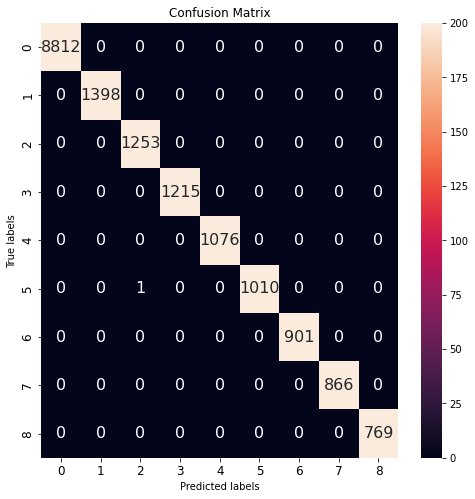

In [48]:
#Decision Tree (preds_pruned) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (8,8))
sns.heatmap(confusion_matrix(y_test,preds_pruned),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [49]:
y_test.value_counts()

0    8812
1    1398
2    1253
3    1215
4    1076
5    1011
6     901
7     866
8     769
Name: label, dtype: int64

In [50]:
confusion_matrix(y_test,preds_pruned)

array([[8812,    0,    0,    0,    0,    0,    0,    0,    0],
       [   0, 1398,    0,    0,    0,    0,    0,    0,    0],
       [   0,    0, 1253,    0,    0,    0,    0,    0,    0],
       [   0,    0,    0, 1215,    0,    0,    0,    0,    0],
       [   0,    0,    0,    0, 1076,    0,    0,    0,    0],
       [   0,    0,    1,    0,    0, 1010,    0,    0,    0],
       [   0,    0,    0,    0,    0,    0,  901,    0,    0],
       [   0,    0,    0,    0,    0,    0,    0,  866,    0],
       [   0,    0,    0,    0,    0,    0,    0,    0,  769]],
      dtype=int64)

As per previous observation we can see that model gave 95% when max_depth=7, min_samples_leaf=6. but class 8 was predicted as zero

So i have used max_depth=8, min_samples_leaf=6 and got 99% Accuracy.

In [51]:
# Another way to look at the precision - recall scores
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test,preds_pruned,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8812
           2       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00      1253
           5       1.00      1.00      1.00      1215
           3       1.00      1.00      1.00      1076
           4       1.00      1.00      1.00      1011
           7       1.00      1.00      1.00       901
           6       1.00      1.00      1.00       866
           8       1.00      1.00      1.00       769

    accuracy                           1.00     17301
   macro avg       1.00      1.00      1.00     17301
weighted avg       1.00      1.00      1.00     17301



## Grid Search - To find the best parameters for Pruned Decision Tree

In [52]:
#Grid Search - To find the best parameters for Pruned Decision Tree
#X_train, X_test, y_train, y_test
# criterion = "gini", random_state = 100, max_depth=7, min_samples_leaf=6
from sklearn.model_selection import GridSearchCV
clf = DecisionTreeClassifier(random_state = 100)
grid_values = {'criterion' : ['gini', 'entropy'],
               'splitter' : ['best', 'random'],
               'max_depth' : np.arange(5,10),
               'min_samples_leaf' : np.arange(4,9)
              }
grid_clf_acc = GridSearchCV(clf, param_grid = grid_values)
grid_clf_acc.fit(X_train, y_train)

#Predict values based on new parameters
y_pred_acc = grid_clf_acc.predict(X_test)
# New Model Evaluation metrics 
print('Evaluation Score : ' + str(grid_clf_acc.score(X_test,y_test)))
print('Best Parameters : ' + str(grid_clf_acc.best_params_))

acc_GS = grid_clf_acc.score(X_test,y_test)

Evaluation Score : 0.9999421998728397
Best Parameters : {'criterion': 'gini', 'max_depth': 8, 'min_samples_leaf': 4, 'splitter': 'best'}


In [53]:
acc_GS

0.9999421998728397

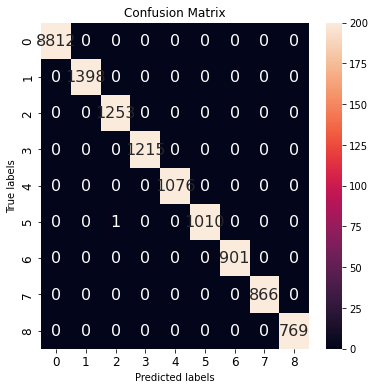

In [54]:
#Decision Tree (Grid Search) Confusion matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test,y_pred_acc),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [55]:
y_test.value_counts()

0    8812
1    1398
2    1253
3    1215
4    1076
5    1011
6     901
7     866
8     769
Name: label, dtype: int64

In [56]:
# Another way to look at the precision - recall scores
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test,y_pred_acc,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8812
           2       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00      1253
           5       1.00      1.00      1.00      1215
           3       1.00      1.00      1.00      1076
           4       1.00      1.00      1.00      1011
           7       1.00      1.00      1.00       901
           6       1.00      1.00      1.00       866
           8       1.00      1.00      1.00       769

    accuracy                           1.00     17301
   macro avg       1.00      1.00      1.00     17301
weighted avg       1.00      1.00      1.00     17301



In [57]:
## Calculating feature importance used for interpretation
feat_importance = clf_pruned.tree_.compute_feature_importances(normalize=False)
feat_imp_dict = dict(zip(feature_cols, clf_pruned.feature_importances_))
feat_imp = pd.DataFrame.from_dict(feat_imp_dict, orient='index')
feat_imp.sort_values(by=0, ascending=False)

0
xs1  0.139688
xs2  0.136008
xs3  0.125680
xs4  0.124794
xs5  0.121427
xs6  0.118655
xs8  0.117482
xs7  0.116265

In [58]:
#Store the accuracy results for each model in a dataframe for final comparison
resultsDf = pd.DataFrame({'Method':['Decision Tree','Pruned Decision Tree','Grid Search Decision Tree'], 'accuracy': [acc,acc_DT,acc_GS]})
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0              Decision Tree  1.000000
1       Pruned Decision Tree  0.999942
2  Grid Search Decision Tree  0.999942

## Predicting with Sample Data

In [59]:
# You can run the model on the new data coming in every day
test = df3.sample(n = 10,replace=True,random_state=100).drop(['label'],axis=1)
test.reset_index(inplace=True,drop=True)

In [60]:
test

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.857443  62.449711  603.880787  92.732141  111.292617  338.807231   
1  20.590270  65.060230  607.669875  93.018312  111.415253  350.102620   
2  21.658071  61.590421  659.361362  91.163234  110.552773  332.687067   
3  25.398511  61.330663  600.723828  92.542419  110.963995  339.986643   
4  20.963265  61.640385  609.978959  91.284282  111.334209  338.715988   
5  22.234535  60.752726  616.870997  90.963678  111.526748  344.107570   
6  22.042356  61.351090  612.182287  91.182509  111.359534  338.148649   
7  20.913340  61.692993  609.561213  96.284466  111.421131  337.948013   
8  22.286768  65.375471  608.811119  93.291063  110.960430  332.842463   
9  21.679184  61.189736  641.242564  91.627682  111.019660  331.960708   

          xs7        xs8  
0  607.682415  90.558511  
1  601.327672  90.578210  
2  611.161887  91.417519  
3  603.924208  92.331294  
4  616.562065  93.091526  
5  611.387378  91.997775  
6  605.917431  92.594838  
7  616.851164  92.261697  
8  603.548966  91.210137  
9  601.754905  93.413253

In [61]:
# Make predictions based on your final mode 
predictions = grid_clf_acc.predict(test)
pd.DataFrame(predictions)

0
0  0
1  2
2  3
3  1
4  0
5  0
6  0
7  4
8  2
9  3

In [62]:
predictions

array([0, 2, 3, 1, 0, 0, 0, 4, 2, 3], dtype=int64)

In [63]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.857443  62.449711  603.880787  92.732141  111.292617  338.807231   
1  20.590270  65.060230  607.669875  93.018312  111.415253  350.102620   
2  21.658071  61.590421  659.361362  91.163234  110.552773  332.687067   
3  25.398511  61.330663  600.723828  92.542419  110.963995  339.986643   
4  20.963265  61.640385  609.978959  91.284282  111.334209  338.715988   
5  22.234535  60.752726  616.870997  90.963678  111.526748  344.107570   
6  22.042356  61.351090  612.182287  91.182509  111.359534  338.148649   
7  20.913340  61.692993  609.561213  96.284466  111.421131  337.948013   
8  22.286768  65.375471  608.811119  93.291063  110.960430  332.842463   
9  21.679184  61.189736  641.242564  91.627682  111.019660  331.960708   

          xs7        xs8  0  
0  607.682415  90.558511  0  
1  601.327672  90.578210  2  
2  611.161887  91.417519  3  
3  603.924208  92.331294  1  
4  616.562065  93.091526  0  
5  611.387378  91.997775  0  
6  605.917431  92.594838  0  
7  616.851164  92.261697  4  
8  603.548966  91.210137  2  
9  601.754905  93.413253  3

####    22.55     62.55     620.55     93.55    111.55    350.55     620.55     93.55

## Apply the Random forest model and print the accuracy of Random forest Model

In [64]:
# Initiate Random Forest Model
from sklearn.ensemble import RandomForestClassifier
rfcl = RandomForestClassifier(n_estimators = 30,oob_score=True,random_state=22)
rfcl = rfcl.fit(X_train, y_train)

In [65]:
# Make predictions and calculate accuracy
pred_RF = rfcl.predict(X_test)
acc_RF = accuracy_score(y_test, pred_RF)
acc_RF

0.9999421998728397

In [66]:
tempResultsDf = pd.DataFrame({'Method':['Random Forest'], 'accuracy': [acc_RF]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']].reset_index(drop=True)
resultsDf

Method  accuracy
0              Decision Tree  1.000000
1       Pruned Decision Tree  0.999942
2  Grid Search Decision Tree  0.999942
3              Random Forest  0.999942

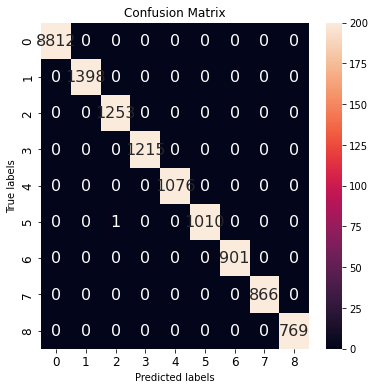

In [67]:
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_RF),annot=True,vmin=0,vmax=200,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [68]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_RF,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8812
           2       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00      1253
           5       1.00      1.00      1.00      1215
           3       1.00      1.00      1.00      1076
           4       1.00      1.00      1.00      1011
           7       1.00      1.00      1.00       901
           6       1.00      1.00      1.00       866
           8       1.00      1.00      1.00       769

    accuracy                           1.00     17301
   macro avg       1.00      1.00      1.00     17301
weighted avg       1.00      1.00      1.00     17301



### Binarize y test (5,6,7) classes to (1,0,0) - (0,0,1) classes to generate AUC ROC Curves 

In [69]:
from sklearn.preprocessing import label_binarize
y_test_bin = label_binarize(y_test, classes=[0,1,2,3,4,5,6,7,8])
n_classes = y_test_bin.shape[1]

In [70]:
y_test_bin

array([[1, 0, 0, ..., 0, 0, 0],
       [0, 0, 1, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 1, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0]])

In [71]:
n_classes

9

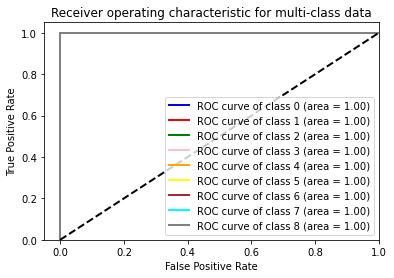

In [72]:
#Generate AUC ROC Curves

from sklearn.multiclass import OneVsRestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve,auc


# classifier
clf = OneVsRestClassifier(RandomForestClassifier(n_estimators = 80,random_state=22))
y_score = clf.fit(X_train, y_train).predict_proba(X_test)

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_bin[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])
colors = ['blue', 'red', 'green','pink','orange','yellow','brown','aqua','grey']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='ROC curve of class {0} (area = {1:0.2f})'
             ''.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()

In [73]:
# Visualize Random Forest Trees
trees = rfcl.estimators_

In [74]:
tree_in_forest = trees[1]
tree_in_forest

DecisionTreeClassifier(max_features='auto', random_state=867424388)

In [75]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('Anomaly_pruned.png')
Image(graph.create_png())

## Apply Bagging Classifier Algorithm and print the accuracy.

In [76]:
# Initiate Bagging Classifier
from sklearn.ensemble import BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier

bgcl = BaggingClassifier(n_estimators=50, max_samples= .7, bootstrap=True, oob_score=True, random_state=22)
bgcl = bgcl.fit(X_train, y_train)

In [77]:
# Make predictions and calculate accuracy
pred_BG = bgcl.predict(X_test)
acc_BG = accuracy_score(y_test, pred_BG)
acc_BG

0.9999421998728397

In [78]:
tempResultsDf = pd.DataFrame({'Method':['Bagging KNeighborsClassifier'], 'accuracy': [acc_BG]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']].reset_index(drop=True)
resultsDf

Method  accuracy
0                 Decision Tree  1.000000
1          Pruned Decision Tree  0.999942
2     Grid Search Decision Tree  0.999942
3                 Random Forest  0.999942
4  Bagging KNeighborsClassifier  0.999942

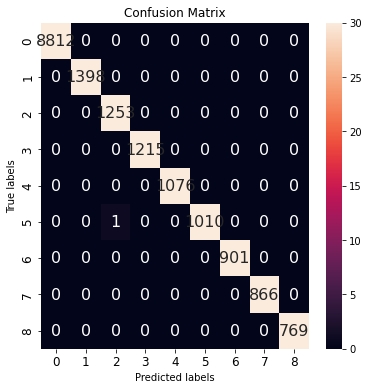

In [79]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_BG),annot=True,vmin=0,vmax=30,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [80]:
## Classification Report
y,levels = pd.factorize(df3['label'].astype(str))
print(metrics.classification_report(y_test, pred_BG,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8812
           2       1.00      1.00      1.00      1398
           1       1.00      1.00      1.00      1253
           5       1.00      1.00      1.00      1215
           3       1.00      1.00      1.00      1076
           4       1.00      1.00      1.00      1011
           7       1.00      1.00      1.00       901
           6       1.00      1.00      1.00       866
           8       1.00      1.00      1.00       769

    accuracy                           1.00     17301
   macro avg       1.00      1.00      1.00     17301
weighted avg       1.00      1.00      1.00     17301



## Apply Adaboost Ensemble Algorithm for the same data and print the accuracy.

In [81]:
# Initiate adaboost classifier
from sklearn.ensemble import AdaBoostClassifier
abcl = AdaBoostClassifier(n_estimators = 100, learning_rate=0.1, random_state=22)
abcl = abcl.fit(X_train, y_train)

In [82]:
# Make predictions and calculate accuracy
pred_AB =abcl.predict(X_test)
acc_AB = accuracy_score(y_test, pred_AB)

In [83]:
acc_AB

0.9999421998728397

In [84]:
tempResultsDf = pd.DataFrame({'Method':['Adaboost'], 'accuracy': [acc_AB]})
resultsDf = pd.concat([resultsDf, tempResultsDf])
resultsDf = resultsDf[['Method', 'accuracy']]
resultsDf

Method  accuracy
0                 Decision Tree  1.000000
1          Pruned Decision Tree  0.999942
2     Grid Search Decision Tree  0.999942
3                 Random Forest  0.999942
4  Bagging KNeighborsClassifier  0.999942
0                      Adaboost  0.999942

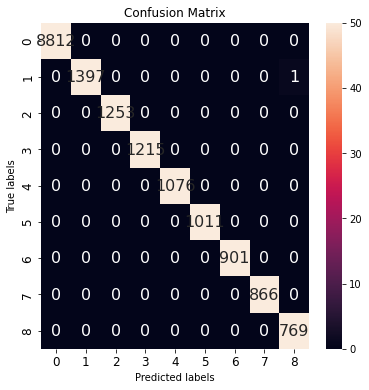

In [85]:
## Confusion Matrix
fig, ax = plt.subplots(nrows=1,ncols=1,figsize = (6,6))
sns.heatmap(confusion_matrix(y_test, pred_AB),annot=True,vmin=0,vmax=50,fmt='g', ax = ax,annot_kws={"size": 16})
# labels, title and ticks
ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
ax.set_title('Confusion Matrix'); 
ax.xaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12); 
ax.yaxis.set_ticklabels(['0','1','2','3','4','5','6','7','8'],fontsize=12);

In [86]:
## Classification Report
y,levels = pd.factorize(df['label'].astype(str))
print(metrics.classification_report(y_test, pred_AB,target_names=levels))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00      8812
           6       1.00      1.00      1.00      1398
           8       1.00      1.00      1.00      1253
           2       1.00      1.00      1.00      1215
           4       1.00      1.00      1.00      1076
           1       1.00      1.00      1.00      1011
           3       1.00      1.00      1.00       901
           7       1.00      1.00      1.00       866
           5       1.00      1.00      1.00       769

    accuracy                           1.00     17301
   macro avg       1.00      1.00      1.00     17301
weighted avg       1.00      1.00      1.00     17301



In [87]:
# Visualize Adaboost Trees
trees_ab = abcl.estimators_

In [88]:
tree_in_forest_ab = trees_ab[1]

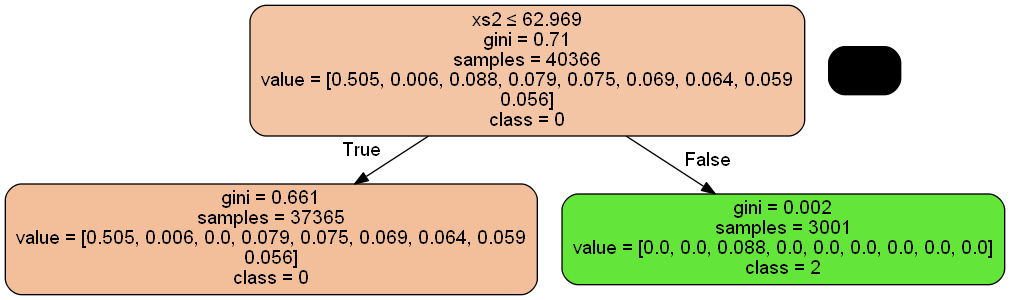

In [89]:
# Plot tree using dot function as before
dot_data = StringIO()
export_graphviz(tree_in_forest_ab, out_file=dot_data,  
                filled=True, rounded=True,
                special_characters=True,feature_names = feature_cols,class_names=['0','1','2','3','4','5','6','7','8'])
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())  
graph.write_png('anomaly_pruned.png')
Image(graph.create_png())

### Dumping model using Pickle

#### Grid Search Decision Tree Classifier

In [90]:
import pickle

In [91]:
# Dump the trained model with Pickle
GSDT_pkl_filename = 'GSDT_classifier_12032022.pkl'
# Open the file to save as pkl file
GSDT_model_pkl = open(GSDT_pkl_filename, 'wb')
pickle.dump(grid_clf_acc, GSDT_model_pkl)
# Close the pickle instances
GSDT_model_pkl.close()

In [92]:
# Loading the saved model pickle
GSDT_model_pkl = open(GSDT_pkl_filename, 'rb')
GSDT_model = pickle.load(GSDT_model_pkl)
print("Loaded Decision tree model :: ", GSDT_model)

Loaded Decision tree model ::  GridSearchCV(estimator=DecisionTreeClassifier(random_state=100),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': array([5, 6, 7, 8, 9]),
                         'min_samples_leaf': array([4, 5, 6, 7, 8]),
                         'splitter': ['best', 'random']})


In [93]:
# load the model from disk
loaded_model = pickle.load(open(GSDT_pkl_filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9999421998728397


In [94]:
test = df3.sample(n = 10,replace=True,random_state=100).drop(['label'],axis=1)
test.reset_index(inplace=True,drop=True)

In [95]:
# Make predictions based on your final mode 
predictions = loaded_model.predict(test)

In [96]:
predictions

array([0, 2, 3, 1, 0, 0, 0, 4, 2, 3], dtype=int64)

In [97]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.857443  62.449711  603.880787  92.732141  111.292617  338.807231   
1  20.590270  65.060230  607.669875  93.018312  111.415253  350.102620   
2  21.658071  61.590421  659.361362  91.163234  110.552773  332.687067   
3  25.398511  61.330663  600.723828  92.542419  110.963995  339.986643   
4  20.963265  61.640385  609.978959  91.284282  111.334209  338.715988   
5  22.234535  60.752726  616.870997  90.963678  111.526748  344.107570   
6  22.042356  61.351090  612.182287  91.182509  111.359534  338.148649   
7  20.913340  61.692993  609.561213  96.284466  111.421131  337.948013   
8  22.286768  65.375471  608.811119  93.291063  110.960430  332.842463   
9  21.679184  61.189736  641.242564  91.627682  111.019660  331.960708   

          xs7        xs8  0  
0  607.682415  90.558511  0  
1  601.327672  90.578210  2  
2  611.161887  91.417519  3  
3  603.924208  92.331294  1  
4  616.562065  93.091526  0  
5  611.387378  91.997775  0  
6  605.917431  92.594838  0  
7  616.851164  92.261697  4  
8  603.548966  91.210137  2  
9  601.754905  93.413253  3

#### |----|    22.55  |----|   62.55  |----|   620.55   |----|  93.55 |----| 111.55  |----|  350.55  |----|   620.55  |----|   93.55  |  Threshold

#### Random Forest Classifier

In [98]:
# Dump the trained model with Pickle
RF_pkl_filename = 'RF_classifier_12032022.pkl'
# Open the file to save as pkl file
RF_model_pkl = open(RF_pkl_filename, 'wb')
pickle.dump(rfcl, RF_model_pkl)
# Close the pickle instances
RF_model_pkl.close()

In [99]:
# Loading the saved model pickle
RF_model_pkl = open(RF_pkl_filename, 'rb')
RF_model = pickle.load(RF_model_pkl)
print("Loaded Decision tree model :: ", RF_model)

Loaded Decision tree model ::  RandomForestClassifier(n_estimators=30, oob_score=True, random_state=22)


In [100]:
# load the model from disk
loaded_model = pickle.load(open(RF_pkl_filename, 'rb'))
result = loaded_model.score(X_test, y_test)
print(result)

0.9999421998728397


In [101]:
test = df3.sample(n = 10,replace=True,random_state=100).drop(['label'],axis=1)
test.reset_index(inplace=True,drop=True)

In [102]:
# Make predictions based on your final mode 
predictions = loaded_model.predict(test)

In [103]:
predictions

array([0, 2, 3, 1, 0, 0, 0, 4, 2, 3], dtype=int64)

In [104]:
pd.concat([test,pd.DataFrame(predictions)], axis=1, join='inner')

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.857443  62.449711  603.880787  92.732141  111.292617  338.807231   
1  20.590270  65.060230  607.669875  93.018312  111.415253  350.102620   
2  21.658071  61.590421  659.361362  91.163234  110.552773  332.687067   
3  25.398511  61.330663  600.723828  92.542419  110.963995  339.986643   
4  20.963265  61.640385  609.978959  91.284282  111.334209  338.715988   
5  22.234535  60.752726  616.870997  90.963678  111.526748  344.107570   
6  22.042356  61.351090  612.182287  91.182509  111.359534  338.148649   
7  20.913340  61.692993  609.561213  96.284466  111.421131  337.948013   
8  22.286768  65.375471  608.811119  93.291063  110.960430  332.842463   
9  21.679184  61.189736  641.242564  91.627682  111.019660  331.960708   

          xs7        xs8  0  
0  607.682415  90.558511  0  
1  601.327672  90.578210  2  
2  611.161887  91.417519  3  
3  603.924208  92.331294  1  
4  616.562065  93.091526  0  
5  611.387378  91.997775  0  
6  605.917431  92.594838  0  
7  616.851164  92.261697  4  
8  603.548966  91.210137  2  
9  601.754905  93.413253  3

#### |----|    22.55  |----|   62.55  |----|   620.55   |----|  93.55 |----| 111.55  |----|  350.55  |----|   620.55  |----|   93.55  |  Threshold

In [105]:
test[0:1]

xs1        xs2         xs3        xs4         xs5         xs6  \
0  21.857443  62.449711  603.880787  92.732141  111.292617  338.807231   

          xs7        xs8  
0  607.682415  90.558511

In [106]:
predictions = loaded_model.predict(test[0:1])

In [107]:
predictions

array([0], dtype=int64)

In [108]:
x = [[23.885571,62.431097,617.893558,91.363482,111.347102,339.331587,604.801748,93.483729]]

In [109]:
x

[[23.885571,
  62.431097,
  617.893558,
  91.363482,
  111.347102,
  339.331587,
  604.801748,
  93.483729]]

In [110]:
predictions = loaded_model.predict(x)

In [111]:
predictions

array([1], dtype=int64)